<a href="https://colab.research.google.com/github/gabriel-u-freitas/Curva_de_Juros_Brasileira_e_Evolucao_Taxas_no_Tempo/blob/main/Minha_adapta%C3%A7%C3%A3o_Curva_de_juros_com_t%C3%ADtulos_p%C3%BAblicos_BR_e_suas_evolu%C3%A7%C3%B5es_de_taxa_ao_longo_do_tempo_(acessando_dados_do_Investing_com_usando_investpy_e_criando_gr%C3%A1ficos_interativos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Bibliotecas

In [ ]:
#instalar a biblioteca investpy
!pip install investpy

In [ ]:
#possibilita acessar os banco de dados do Investing.com
import investpy as inv

In [ ]:
#possibilita criar gráficos interativos (usei para selecionar séries diretamente por meio da legenda do gráfico)
import plotly.graph_objects as go

In [ ]:
#usei para criar data frames e acessar bases de dados online através da leitura de arquivos .json
import pandas as pd

In [ ]:
#possibilita criar gráficos
import matplotlib.pyplot as plt
#configurei um parâmetro padrão para os gráficos que eu criar usando plt
plt.rcParams['figure.figsize'] = (16,8)

### Acessando dados títulos públicos brasileiros no Investing.com e plotando Curva de Juros BR

In [ ]:
#acessar lista de títulos públicos brasileiros e armazenar numa lista 'bondsBR'
bondsBR = inv.get_bonds_list('brazil')

In [ ]:
bondsBR

['Brazil 3M',
 'Brazil 6M',
 'Brazil 9M',
 'Brazil 1Y',
 'Brazil 2Y',
 'Brazil 3Y',
 'Brazil 5Y',
 'Brazil 8Y',
 'Brazil 10Y']

In [ ]:
#acessar infos títulos públicos brasileiros e armazenar num DataFrame
bonds_overview  = inv.get_bonds_overview('brazil')

In [ ]:
bonds_overview

,country,name,last,last_close,high,low,change,change_percentage
0,brazil,Brazil 3M,11.822,11.220,11.231,11.231,+0.602,+5.37%
1,brazil,Brazil 6M,12.467,12.090,11.985,11.985,+0.378,+3.12%
2,brazil,Brazil 9M,12.767,12.615,12.455,12.455,+0.152,+1.21%
3,brazil,Brazil 1Y,12.920,12.780,12.790,12.790,+0.140,+1.10%
4,brazil,Brazil 2Y,11.590,12.410,12.230,12.230,-0.821,-6.61%
5,brazil,Brazil 3Y,11.910,11.615,11.910,11.720,+0.295,+2.54%
6,brazil,Brazil 5Y,11.553,11.325,11.590,11.515,+0.228,+2.01%
7,brazil,Brazil 8Y,11.588,11.290,11.635,11.615,+0.298,+2.64%
8,brazil,Brazil 10Y,11.580,11.330,11.625,11.625,+0.250,+2.21%


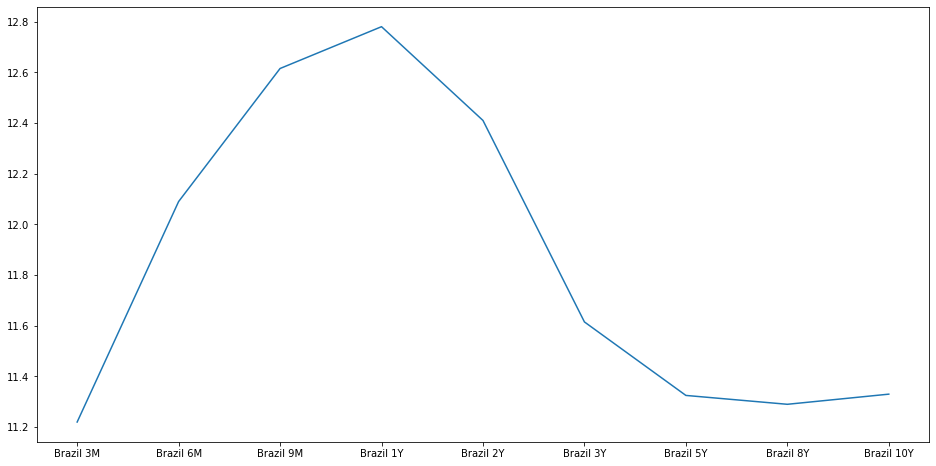

In [ ]:
#plotar um gráfico usando a coluna 'last_close' de cada um dos títulos BR (curva de juros usando títulos públicos)
plt.plot(bondsBR, bonds_overview['last_close']);

In [ ]:
#acessar histórico de taxa de um título específico (nesse caso, de 1 ano) e armazenar num df
data_inicio = '01/01/2010'
data_fim = '02/03/2022'

um_ano = inv.get_bond_historical_data('Brazil 1Y', from_date=data_inicio, to_date=data_fim)
um_ano

,Open,High,Low,Close
Date,,,,
2010-01-04,11.040,11.416,11.010,11.360
2010-01-05,11.370,11.400,11.310,11.320
2010-01-06,11.350,11.350,11.270,11.295
2010-01-07,11.275,11.416,11.270,11.416
2010-01-08,11.285,11.416,11.205,11.205
...,...,...,...,...
2022-02-22,12.580,12.580,12.580,12.580
2022-02-23,12.470,12.530,12.470,12.530
2022-02-24,12.520,12.610,12.520,12.610


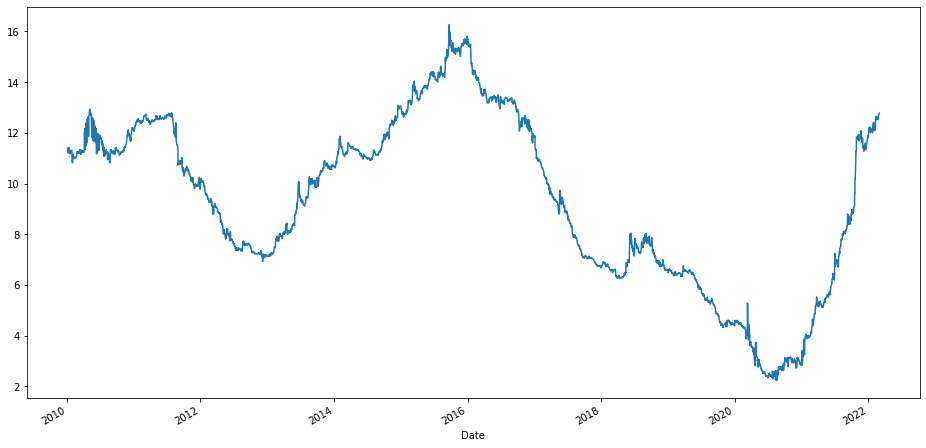

In [ ]:
#plotar um gráfico usando a coluna 'Close' do títlo 'Brazil 1Y' (evolução histórica da taxa desse título)
um_ano['Close'].plot();

In [ ]:
#criar um for loop para acessar histórico de taxa de todos os títulos existentes na lista 'bondsBR', um a um, e armazenar num df
data_inicio = '01/01/2010'
data_fim = '02/03/2022'
bonds = pd.DataFrame()

for titulo in bondsBR:
  bonds[titulo] = inv.get_bond_historical_data(titulo, from_date=data_inicio, to_date=data_fim)['Close']

In [ ]:
bonds

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-04,8.680,9.170,10.475,11.360,11.910,12.700,12.740,NaN,NaN
2010-01-05,8.670,9.170,10.445,11.320,11.890,12.740,12.740,NaN,NaN
2010-01-06,8.670,9.140,10.330,11.295,11.820,12.750,12.740,NaN,NaN
2010-01-07,8.700,9.140,10.330,11.416,11.264,12.770,12.770,NaN,NaN
2010-01-08,8.650,9.110,10.300,11.205,11.770,12.760,12.760,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-02-22,11.156,12.015,12.445,12.580,12.230,11.483,11.170,11.14,11.21
2022-02-23,11.160,12.005,12.430,12.530,12.100,11.343,11.060,11.11,11.17
2022-02-24,11.182,12.055,12.500,12.610,12.200,11.470,11.180,11.25,11.31


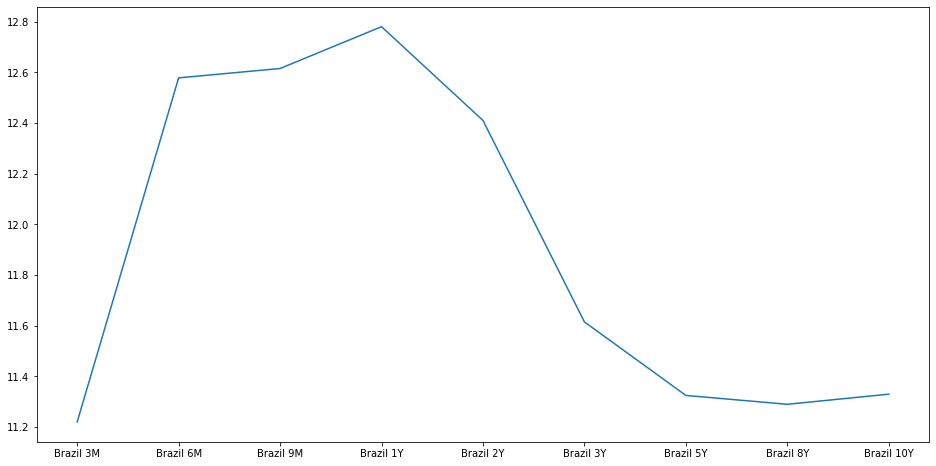

In [ ]:
#plotar curva de juros de algum dia específico (títulos da lista 'bondsBR' como eixo X e, como eixo Y, os valores na linha do df 'bonds' que corresponde à data especificada)
plt.plot(bondsBR, bonds.loc['2022-03-02'].values);

In [ ]:
#mesma coisa que fiz acima, porém utilizando intervalos mensais no acesso aos dados do Investing.com (parâmetro "interval='Monthly'")
data_inicio = '01/01/2010'
data_fim = '02/03/2022'
bondsMensal = pd.DataFrame()

for titulo in bondsBR:
  bondsMensal[titulo] = inv.get_bond_historical_data(titulo, from_date=data_inicio, to_date=data_fim, interval='Monthly')['Close']

In [ ]:
bondsMensal

,Brazil 3M,Brazil 6M,Brazil 9M,Brazil 1Y,Brazil 2Y,Brazil 3Y,Brazil 5Y,Brazil 8Y,Brazil 10Y
Date,,,,,,,,,
2010-01-01,8.670,9.110,10.350,10.855,11.800,12.117,12.760,NaN,NaN
2010-02-01,8.773,9.330,10.500,11.260,11.700,12.289,NaN,NaN,NaN
2010-03-01,9.195,9.870,10.408,11.259,11.733,12.154,NaN,NaN,NaN
2010-04-01,10.610,11.190,11.130,12.648,12.380,12.700,NaN,NaN,NaN
2010-05-01,10.990,11.390,11.735,12.355,12.090,12.422,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-11-01,8.855,10.080,11.250,11.675,12.135,11.905,11.525,11.400,11.41
2021-12-01,9.255,10.325,11.325,11.805,11.715,11.160,10.700,10.330,10.31
2022-01-01,10.928,11.875,12.305,12.420,12.000,11.360,11.025,11.485,11.08


In [ ]:
#criar váriavel 'fig' que vai receber função do plotly '.Figure()' que serve para criar gráficos interativos

fig = go.Figure()

#para cada uma das datas no df esse for loop vai adicionar um "traço", ou seja, uma série com a taxa de todos os títulos BR naquela data (lembrando, mensalmente)
for i in bondsMensal.index:
  fig.add_trace(
      go.Scatter(
          x=bondsBR,
          y=bondsMensal.loc[i], #loc busca baseado no label, enquanto iloc seleciona a partir do valor numérico de índice (ambos linha e/ou coluna)
          mode='lines',
          name=str(i),
          visible=False #faz com que o gráfico inicialmente não mostre nenhuma curva de juros (ao invés de todas ao mesmo tempo)
      )
  )

fig.data[0].visible = True #faz com que o gráfico inicialmente só apareça a curva de juros da data 0 (ou seja, aquela que está 'selecionada' por padrão)

In [ ]:
#criar uma lista vazia 'steps', a qual receberá diversos (93) dicionários
steps = []

#vai criar um dicionário (93 vezes) com a configuração sobre o que a linha do tempo tem que 'fazer' quando cada data estiver selecionada e, ainda, configurar o layout dessa linha do tempo
for i in range(len(fig.data)):
  step = dict(
      method='restyle',
      args=['visible', [False] * len(fig.data)], #todos as curvas de juros ficarão invisíveis quando uma determinada data estiver selecionada
      label=fig.data[i]['name'][:7] #somente aparecer um 7 primeiros caracteres da data (AAAA-MM), do caracter de posição 0 até o 6
  )
  step['args'][1][i] = True #vai trocar um False por um True na respectiva curva de juros da data selecionada (para que a série possa aparecer no gráfico)
  steps.append(step) #vai adicionar esse dicionário criado na lista 'steps' criada anteriormente (1 dicionário para cada um dos 93 passos)

In [ ]:
steps

In [ ]:
#adicionar uma barra de rolagem de linha do tempo que sirva como segmentação de dados (slider)
sliders = [dict(
    active=0, #seleção inicial padrão
    currentvalue={'prefix':"Mês: "}, #visualizador de seleção atual com prefixo 'Mês: '
    pad={'t':50}, #espaçamento entre linha do tempo e gráfico
    steps=steps #passos e instruções sobre o que fazer quando cada data estiver selecionada
)]

#fazer update no gráfico para adicionar slider criado
fig.update_layout(
    sliders=sliders,
    yaxis = dict(range=[1.5,15])
)

fig.show()

### Acessando taxa Selic usando base de dados do BCB e comparando com taxas dos títulos públicos BR ao longo do tempo (gráfico interativo usando biblioteca **plotly**)



In [ ]:
def consulta_bc(codigo_bcb):
  uri = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(uri)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [ ]:
selic_meta = consulta_bc(432)

In [ ]:
s2015 = selic_meta[selic_meta.index.year >= 2015]
b2015 = bonds[bonds.index.year >= 2015]

In [ ]:
fig = go.Figure()

for i in bondsBR:
  fig.add_trace(go.Scatter(x=b2015.index, y=b2015[i], mode='lines', name=str(i)))

fig.add_trace(go.Scatter(x=s2015.index, y=s2015['valor'], mode='lines', name='SELIC', line={'color':'black'}))

fig.show()